In [2]:
# Are Oscars nominated production companies  consistently associated with high-performing movies?
# Compare revenue between movies that were produced by these companies and the rest of movies realeased in 2023.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('../data_cleaned/merged_data.csv')

data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')

movies_2022 = data[data['release_date'].dt.year == 2022]

In [3]:
movies_2022

,Unnamed: 0,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,...,imdb_id,original_language,popularity,genres,production_companies,production_countries,spoken_languages,film_oscar_nominee,company_nominated,license
8,8,76600,Avatar: The Way of Water,7.654,9830,Released,2022-12-14,2320250281,192,False,...,tt1630029,en,241.285,Science Fiction,"20th Century Studios, Lightstorm Entertainment",United States of America,English,1.0,0,PG-13
26,28,414906,The Batman,7.705,8584,Released,2022-03-01,770945583,177,False,...,tt1877830,en,100.817,Crime,"6th & Idaho, Dylan Clark Productions, DC Films...",United States of America,English,1.0,1,PG-13
31,33,453395,Doctor Strange in the Multiverse of Madness,7.355,7991,Released,2022-05-04,955775804,126,False,...,tt9419884,en,96.530,Fantasy,"Marvel Studios, Kevin Feige Productions",United States of America,"Cantonese, English, Spanish",0.0,0,PG-13
40,42,361743,Top Gun: Maverick,8.260,7546,Released,2022-05-24,1488732821,131,False,...,tt1745960,en,126.291,Action,"Skydance, Don Simpson/Jerry Bruckheimer Films,...",United States of America,English,1.0,1,PG-13
48,50,616037,Thor: Love and Thunder,6.517,6510,Released,2022-07-06,760928081,119,False,...,tt10648342,en,117.087,Fantasy,"Marvel Studios, Kevin Feige Productions",United States of America,English,0.0,0,PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,623,843380,Dead for a Dollar,5.680,136,Released,2022-09-30,81403,106,False,...,tt14895206,en,29.912,Western,"Chaos, a Film Company, Polaris Pictures","Canada, United States of America",English,0.0,0,unknown
614,625,850028,"Alice, Darling",5.878,135,Released,2022-12-30,121067,90,False,...,tt11687104,en,15.812,Thriller,"Babe Nation Films, Elevation Pictures, Castell...","Canada, United States of America",English,0.0,0,unknown
622,633,823147,To Leslie,7.125,128,Released,2022-10-07,27322,119,False,...,tt8129806,en,13.290,Drama,"BCDF Pictures, Baral Waley Productions, Shaken...",United States of America,English,1.0,0,unknown
628,639,747803,One Way,6.100,115,Released,2022-09-02,30272,96,False,...,tt13075730,en,18.822,Action,"Highland Film Group, Bay Point Media, 23ten, P...","Ireland, United Kingdom, United States of America",English,0.0,0,unknown


In [4]:
columns_to_drop = ['Unnamed: 0',	
                   'id',	
                   'title',	
                   'vote_average',	
                   'vote_count',	
                   'status',	
                   'runtime',	
                   'adult', 
                   'imdb_id',	
                   'original_language',	
                   'popularity',	
                   'genres',
                   'production_countries',	
                   'spoken_languages',	
                   'film_oscar_nominee',
                   'license',
                   'budget']
movies_2022 = movies_2022.drop(columns=columns_to_drop)

In [5]:
def keep_first_word(string):
    return string.split(',')[0]
movies_2022['production_companies'] = movies_2022['production_companies'].apply(keep_first_word)
movies_2022.head()

,release_date,revenue,production_companies,company_nominated
8,2022-12-14,2320250281,20th Century Studios,0
26,2022-03-01,770945583,6th & Idaho,1
31,2022-05-04,955775804,Marvel Studios,0
40,2022-05-24,1488732821,Skydance,1
48,2022-07-06,760928081,Marvel Studios,0


In [11]:
movies_2022.head()

,release_date,revenue,production_companies,company_nominated,revenue_M
8,2022-12-14,2320250281,20th Century Studios,0,2320.250281
26,2022-03-01,770945583,6th & Idaho,1,770.945583
31,2022-05-04,955775804,Marvel Studios,0,955.775804
40,2022-05-24,1488732821,Skydance,1,1488.732821
48,2022-07-06,760928081,Marvel Studios,0,760.928081


In [7]:
movies_2022_describe = movies_2022.describe()
movies_2022['revenue_M'] = movies_2022['revenue']/1000000

In [8]:
revenue_median = movies_2022['revenue'].quantile(0.5)
revenue_median

24733572.0

In [10]:
movies_2022 = movies_2022.drop('revenue')

KeyError: "['revenue'] not found in axis"

In [36]:
movies_2022.head()

,release_date,revenue,production_companies,company_nominated,revenue_M
8,2022-12-14,2320250281,20th Century Studios,0,2320.25
26,2022-03-01,770945583,6th & Idaho,1,770.95
31,2022-05-04,955775804,Marvel Studios,0,955.78
40,2022-05-24,1488732821,Skydance,1,1488.73
48,2022-07-06,760928081,Marvel Studios,0,760.93


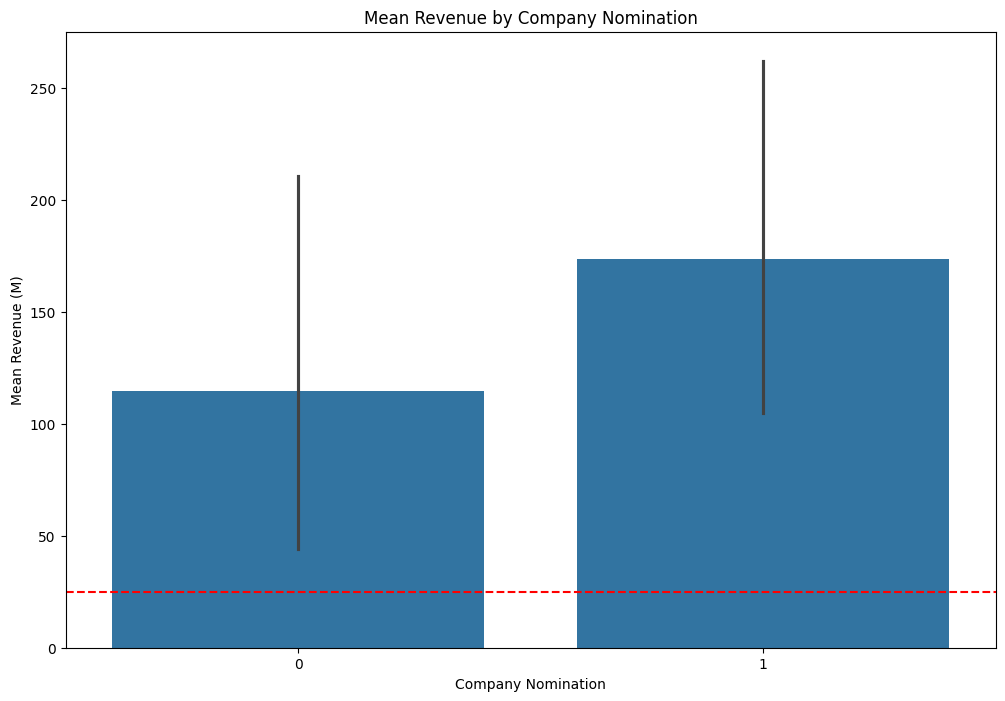

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.barplot(x='company_nominated', y='revenue_M', data=movies_2022, estimator='mean')
plt.axhline(y=revenue_median/1000000, color='red', linestyle='--', label='Median Revenue')
plt.title('Mean Revenue by Company Nomination')
plt.xlabel('Company Nomination')
plt.ylabel('Mean Revenue (M)')
plt.show()

In [ ]:
# 2_sample t-test. H0: mean_revenue_1 > 